In [1]:
import numpy as np
import tifffile
import glob
import os

from reco_helper import reconstruct_one_slice, get_spectrum

from matplotlib import pyplot as plt
%matplotlib inline

from tqdm.auto import tqdm

In [2]:
before = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_1366/proj_0.npy')
after = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_1366_processed/proj_0.npy')

In [3]:
before.shape, after.shape

((1366, 512, 512), (1364, 512, 512))

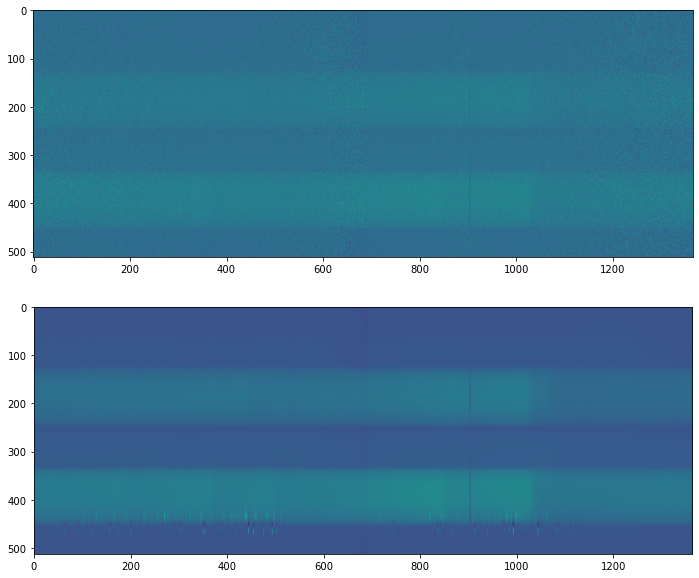

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 10))
ax1.imshow(before[:, 200].T)
ax2.imshow(after[:, 200].T)
plt.show()

In [5]:
%%time
slice_number = 127

sino_before = []
for i in tqdm(range(120)):
    sino_before.append(np.load(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_1366/proj_{i}.npy', 
                               mmap_mode='r')[:, slice_number])
sino_before = np.stack(sino_before, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

CPU times: user 1.09 s, sys: 11.6 s, total: 12.7 s
Wall time: 2min 46s


In [6]:
reco_before = reconstruct_one_slice(sino_before)

Finish FBP recon for channel 1365
FBP Reconstruction Complete!


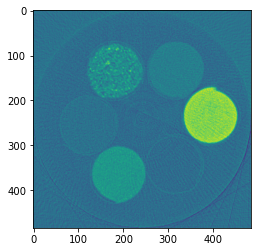

In [7]:
plt.imshow(reco_before.sum(0))

In [8]:
%%time
sino_after = []
for i in tqdm(range(120)):
    img = tifffile.memmap(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/projections_1366_processed/proj_{i}.npy')
    sino_after.append(img[:, slice_number])
sino_after = np.stack(sino_after, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

CPU times: user 4.56 s, sys: 27.4 s, total: 32 s
Wall time: 7min 35s


In [9]:
reco_after = reconstruct_one_slice(sino_after)

Finish FBP recon for channel 1363
FBP Reconstruction Complete!


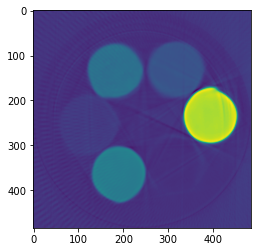

In [10]:
plt.imshow(reco_after.sum(0))

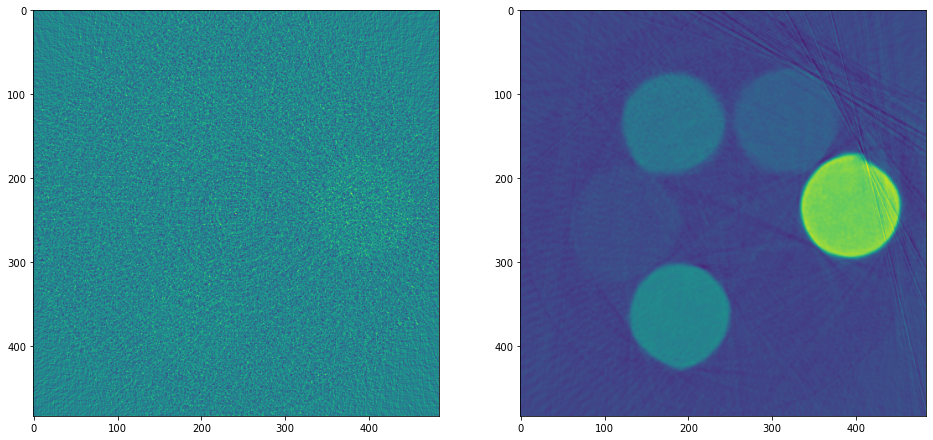

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(reco_before[200])
ax2.imshow(reco_after[200])
plt.show()

In [19]:
reco_after = np.concatenate([reco_after[[0]], reco_after, reco_after[[-1]]])

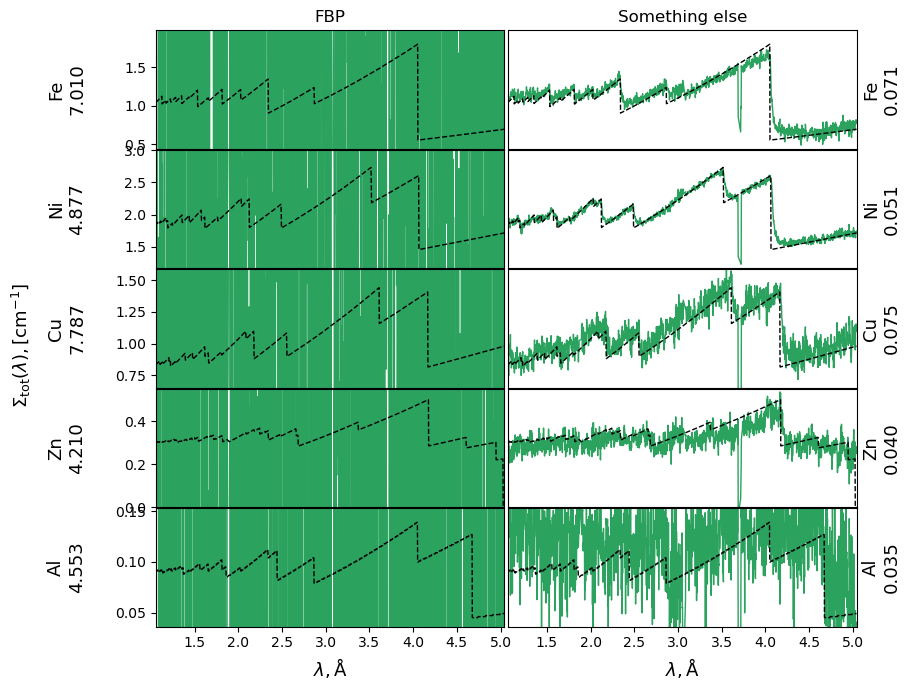

In [21]:
get_spectrum(reco_before, reco_after, binning=[4, 2, 2, 1])